In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import gudhi

In [2]:
Y = [(0.5120967741935484, 0.07359307359307363), (0.4838709677419355, 0.9691558441558443), (0.5120967741935484, 0.26028138528138534), (0.43145161290322587, 0.170995670995671), (0.5786290322580645, 0.13582251082251087), (0.5685483870967742, 0.23863636363636367), (0.5423387096774194, 0.925865800865801), (0.5, 0.8284632034632036), (0.4173387096774194, 0.8636363636363638), (0.4173387096774194, 0.9366883116883118), (0.0463709677419355, 0.7012987012987013), (0.08870967741935484, 0.6607142857142858), (0.14919354838709678, 0.6742424242424243), (0.1592741935483871, 0.7662337662337663), (0.08467741935483872, 0.7905844155844156), (0.12903225806451615, 0.26569264069264076), (0.19354838709677422, 0.2467532467532468), (0.22983870967741934, 0.30086580086580095), (0.2056451612903226, 0.3847402597402598), (0.13911290322580647, 0.3603896103896105), (0.7540322580645161, 0.5064935064935066), (0.8165322580645161, 0.4767316017316018), (0.8729838709677419, 0.5606060606060607), (0.8245967741935484, 0.6553030303030304), (0.75, 0.6174242424242425)]
DATA = np.array(Y) 

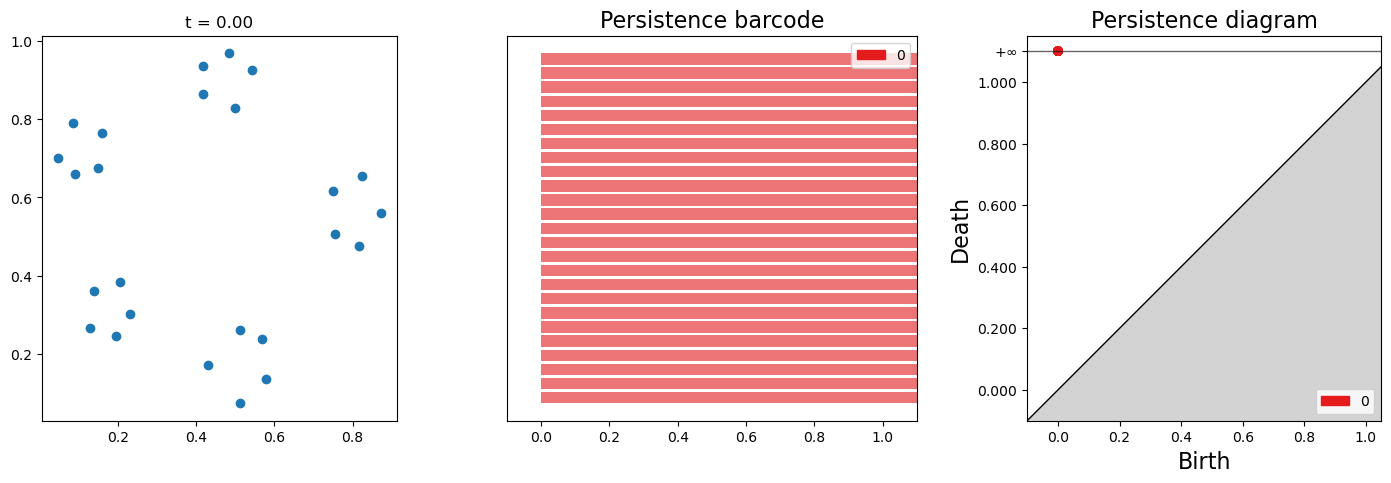

In [4]:
# rips_complex = gudhi.RipsComplex(points=DATA, max_edge_length=1.0)
# simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
# simplex_tree.compute_persistence()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

t_max = 0.7
t_values = np.linspace(0, t_max, 30)

def update(frame):
    """
    0 <= frame <= t_max
    update the frame of the animation with :
    ax1 : Rips subcomplexe
    ax2 : persistence barcode
    ax3 : persistence diagram
    """
    ax1.clear() ; ax2.clear() ; ax3.clear()
    t = t_values[frame]

    # compute persistence
    rips_t = gudhi.RipsComplex(points=DATA, max_edge_length=t)
    simplex_t = rips_t.create_simplex_tree(max_dimension=2) # complexe of dimension 2
    simplex_t.compute_persistence()
    persistence_t = simplex_t.persistence()

    # left plot : Rips subcomplexe at time t
    lower_filtration = simplex_t.get_filtration()
    ax1.scatter(DATA[:,0], DATA[:,1])
    ax1.set_aspect('equal')
    ax1.set_title(f't = {t:.2f}')
    
    for fil in lower_filtration:
        points = [DATA[i] for i in fil[0]]
        if len(points) == 3: # 2-dimensional simplices
            patch = Polygon(points, closed=True, facecolor='magenta', alpha=0.1)
            ax1.add_patch(patch)
        elif len(points) == 2: # 1-dimensional simplices
            ax1.plot([points[0][0], points[1][0]], [points[0][1], points[1][1]], 'm-', linewidth=2)

    # middle plot : persistence barcode
    gudhi.plot_persistence_barcode(persistence_t, axes=ax2) 

    # right plot : persistence diagram
    gudhi.plot_persistence_diagram(persistence_t, axes=ax3)
    ax3.set_aspect('equal')

ani = FuncAnimation(fig, update, frames=len(t_values), interval=800, repeat=True)
HTML(ani.to_jshtml())